In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Freelancer/Mall_Customers.csv')

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Show first 5 rows of the selected features
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


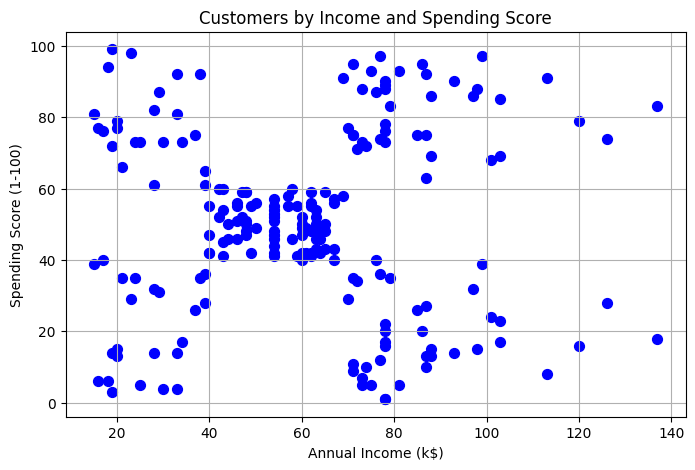

In [8]:
# Scatter plot to visualize customer distribution
plt.figure(figsize=(8,5))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='blue', s=50)
plt.title("Customers by Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


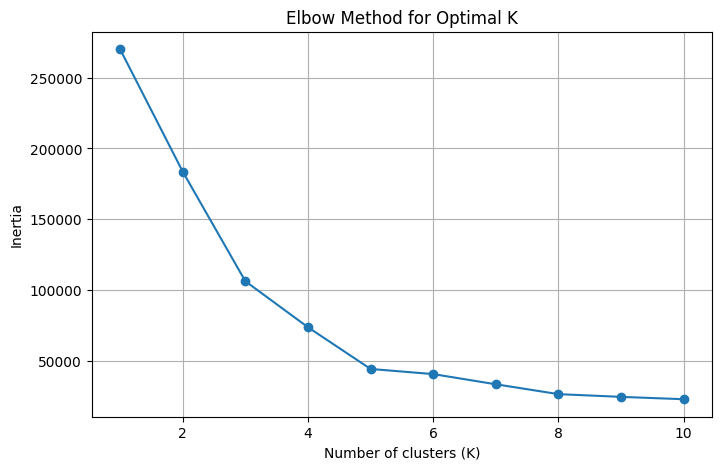

In [9]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [10]:
# Apply KMeans with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Show the first few rows with the new cluster
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


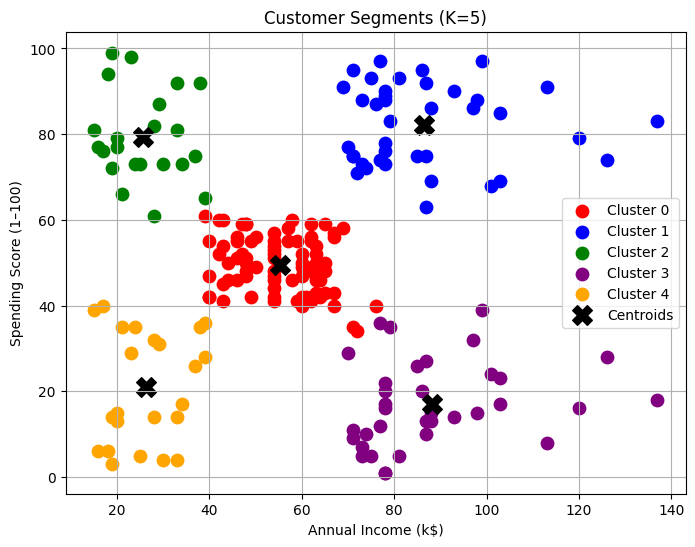

In [11]:
# Visualize the clusters
plt.figure(figsize=(8,6))

# Use a color for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    plt.scatter(
        X[clusters == i]["Annual Income (k$)"],
        X[clusters == i]["Spending Score (1-100)"],
        s=80, c=colors[i], label=f'Cluster {i}'
    )

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title("Customer Segments (K=5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Save the data with cluster labels to a CSV file
df.to_csv('mall_customer_final.csv', index=False)

In [32]:
from google.colab import files
files.download('mall_customer_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df.to_csv('/content/drive/MyDrive/Freelancer/mall_customer_final.csv', index=False)
